# Creating the Dataset

You just got hired as the first and only data practitioner at a small business experiencing exponential growth. The company needs more structured processes, guidelines, and standards. Your first mission is to structure the human resources data. The data is currently scattered across teams and files and comes in various formats: Excel files, CSVs, JSON files...

You'll work with the following data in the `datasets` folder:
- __Office addresses__ are currently saved in `office_addresses.csv`. If the value for office is `NaN`, then the employee is remote. 
- __Employee addresses__ are saved on the first tab of `employee_information.xlsx`.
- __Employee emergency contacts__ are saved on the second tab of `employee_information.xlsx`; this tab is called `emergency_contacts`. However, this sheet was edited at some point, and the headers were removed! The HR manager let you know that they should be: `employee_id`, `last_name`, `first_name`, `emergency_contact`, `emergency_contact_number`, and `relationship`.
- __Employee roles, teams, and salaries__ have been exported from the company's human resources management system into a JSON file titled `employee_roles.json`. Here are the first few lines of that file:
```
{"A2R5H9":
  {
    "title": "CEO",
    "monthly_salary": "$4500",
    "team": "Leadership"
  },
 ...
}

In [24]:
import pandas as pd
import numpy as np

**First, I'll add the three different data files to the system as three different dataframes in order to convert them to the same format and also to help data visualization.**

In [25]:
df_roles = pd.read_json("https://github.com/matheusaraujotrd/Projetos-Data-Science/blob/main/Projeto-Datacamp-01-Empresa/datasets/employee_roles.json?raw=true", orient="index")
df_roles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A2R5H9 to M1Z7U9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           4 non-null      object
 1   monthly_salary  4 non-null      object
 2   team            4 non-null      object
dtypes: object(3)
memory usage: 128.0+ bytes


In [26]:
df_address = pd.read_csv("https://github.com/matheusaraujotrd/Projetos-Data-Science/blob/main/Projeto-Datacamp-01-Empresa/datasets/office_addresses.csv?raw=true")
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   office                3 non-null      object
 1   office_country        3 non-null      object
 2   office_city           3 non-null      object
 3   office_street         3 non-null      object
 4   office_street_number  3 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 248.0+ bytes


In [27]:
df_employee = pd.read_excel("https://github.com/matheusaraujotrd/Projetos-Data-Science/blob/main/Projeto-Datacamp-01-Empresa/datasets/employee_information.xlsx?raw=true")
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   employee_id             4 non-null      object
 1   employee_last_name      4 non-null      object
 2   employee_first_name     4 non-null      object
 3   employee_country        4 non-null      object
 4   employee_city           4 non-null      object
 5   employee_street         4 non-null      object
 6   employee_street_number  4 non-null      int64 
dtypes: int64(1), object(6)
memory usage: 352.0+ bytes


In [28]:
df_employee_emergency = pd.read_excel("https://github.com/matheusaraujotrd/Projetos-Data-Science/blob/main/Projeto-Datacamp-01-Empresa/datasets/employee_information.xlsx?raw=true", 1, header=None)
df_employee_emergency.columns = ["employee_id", "last_name", "first_name", "emergency_contact", "emergency_contact_number", "relationship"]
df_employee_emergency.head()

,employee_id,last_name,first_name,emergency_contact,emergency_contact_number,relationship
0,A2R5H9,Hunman,Jax,Opie Hurst,+32-456-5556-84,Brother
1,H8K0L6,Siff,Tara,Wendy de Matteo,+44-020-5554-333,Sister
2,G4R7V0,Sagal,Gemma,John Newmark,+1-202-555-194,Husband
3,M1Z7U9,Coates,Tig,Venus Noone,+1-202-555-0130,Wife


In [29]:
display(df_employee.head(), df_roles.head(), df_address.head())

,employee_id,employee_last_name,employee_first_name,employee_country,employee_city,employee_street,employee_street_number
0,A2R5H9,Hunman,Jax,BE,Leuven,Grote Markt,9
1,H8K0L6,Siff,Tara,GB,London,Baker Street,221
2,G4R7V0,Sagal,Gemma,US,New-York,Perry Street,66
3,M1Z7U9,Coates,Tig,FR,Paris,Rue de l'Université,7


,title,monthly_salary,team
A2R5H9,CEO,$4500,Leadership
H8K0L6,CFO,$4500,Leadership
G4R7V0,Business Developer,$3000,Sales
M1Z7U9,Office Manager,$2000,People Operations


,office,office_country,office_city,office_street,office_street_number
0,Leuven Office,BE,Leuven,Martelarenlaan,38
1,ESB Office,US,New York City,Fifth Avenue,350
2,WeWork Office,GB,London,Old Street,207


**Now to merge all the data:**

In [30]:
df_merge = df_employee.merge(df_roles, left_on="employee_id", right_on=df_roles.index)

display(df_merge.info(), df_merge.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   employee_id             4 non-null      object
 1   employee_last_name      4 non-null      object
 2   employee_first_name     4 non-null      object
 3   employee_country        4 non-null      object
 4   employee_city           4 non-null      object
 5   employee_street         4 non-null      object
 6   employee_street_number  4 non-null      int64 
 7   title                   4 non-null      object
 8   monthly_salary          4 non-null      object
 9   team                    4 non-null      object
dtypes: int64(1), object(9)
memory usage: 352.0+ bytes


None

,employee_id,employee_last_name,employee_first_name,employee_country,employee_city,employee_street,employee_street_number,title,monthly_salary,team
0,A2R5H9,Hunman,Jax,BE,Leuven,Grote Markt,9,CEO,$4500,Leadership
1,H8K0L6,Siff,Tara,GB,London,Baker Street,221,CFO,$4500,Leadership
2,G4R7V0,Sagal,Gemma,US,New-York,Perry Street,66,Business Developer,$3000,Sales
3,M1Z7U9,Coates,Tig,FR,Paris,Rue de l'Université,7,Office Manager,$2000,People Operations


In [31]:
df_employees = df_address.merge(df_merge, left_on="office_country", right_on="employee_country", how="right")
display(df_employees.info(), df_employees.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   office                  3 non-null      object 
 1   office_country          3 non-null      object 
 2   office_city             3 non-null      object 
 3   office_street           3 non-null      object 
 4   office_street_number    3 non-null      float64
 5   employee_id             4 non-null      object 
 6   employee_last_name      4 non-null      object 
 7   employee_first_name     4 non-null      object 
 8   employee_country        4 non-null      object 
 9   employee_city           4 non-null      object 
 10  employee_street         4 non-null      object 
 11  employee_street_number  4 non-null      int64  
 12  title                   4 non-null      object 
 13  monthly_salary          4 non-null      object 
 14  team                    4 non-null      object

None

,office,office_country,office_city,office_street,office_street_number,employee_id,employee_last_name,employee_first_name,employee_country,employee_city,employee_street,employee_street_number,title,monthly_salary,team
0,Leuven Office,BE,Leuven,Martelarenlaan,38.0,A2R5H9,Hunman,Jax,BE,Leuven,Grote Markt,9,CEO,$4500,Leadership
1,WeWork Office,GB,London,Old Street,207.0,H8K0L6,Siff,Tara,GB,London,Baker Street,221,CFO,$4500,Leadership
2,ESB Office,US,New York City,Fifth Avenue,350.0,G4R7V0,Sagal,Gemma,US,New-York,Perry Street,66,Business Developer,$3000,Sales
3,NaN,NaN,NaN,NaN,NaN,M1Z7U9,Coates,Tig,FR,Paris,Rue de l'Université,7,Office Manager,$2000,People Operations


In [32]:
df_employees = df_employees.merge(df_employee_emergency, "left", on="employee_id")
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   office                    3 non-null      object 
 1   office_country            3 non-null      object 
 2   office_city               3 non-null      object 
 3   office_street             3 non-null      object 
 4   office_street_number      3 non-null      float64
 5   employee_id               4 non-null      object 
 6   employee_last_name        4 non-null      object 
 7   employee_first_name       4 non-null      object 
 8   employee_country          4 non-null      object 
 9   employee_city             4 non-null      object 
 10  employee_street           4 non-null      object 
 11  employee_street_number    4 non-null      int64  
 12  title                     4 non-null      object 
 13  monthly_salary            4 non-null      object 
 14  team          

In [33]:
df_employees.fillna({"office":"Remote", "office_country":"Remote", "office_city":"Remote", "office_street":"Remote", "office_street_number":"Remote"}, inplace=True)
df_employees.head()

,office,office_country,office_city,office_street,office_street_number,employee_id,employee_last_name,employee_first_name,employee_country,employee_city,employee_street,employee_street_number,title,monthly_salary,team,last_name,first_name,emergency_contact,emergency_contact_number,relationship
0,Leuven Office,BE,Leuven,Martelarenlaan,38.0,A2R5H9,Hunman,Jax,BE,Leuven,Grote Markt,9,CEO,$4500,Leadership,Hunman,Jax,Opie Hurst,+32-456-5556-84,Brother
1,WeWork Office,GB,London,Old Street,207.0,H8K0L6,Siff,Tara,GB,London,Baker Street,221,CFO,$4500,Leadership,Siff,Tara,Wendy de Matteo,+44-020-5554-333,Sister
2,ESB Office,US,New York City,Fifth Avenue,350.0,G4R7V0,Sagal,Gemma,US,New-York,Perry Street,66,Business Developer,$3000,Sales,Sagal,Gemma,John Newmark,+1-202-555-194,Husband
3,Remote,Remote,Remote,Remote,Remote,M1Z7U9,Coates,Tig,FR,Paris,Rue de l'Université,7,Office Manager,$2000,People Operations,Coates,Tig,Venus Noone,+1-202-555-0130,Wife


**And the final formatting on the data:**

In [34]:
df_employees.drop(["last_name", "first_name"], axis="columns", inplace=True)
df_employees.rename(columns={"employee_last_name":"last_name", "employee_first_name":"first_name"}, inplace=True)
df_employees.head()

,office,office_country,office_city,office_street,office_street_number,employee_id,last_name,first_name,employee_country,employee_city,employee_street,employee_street_number,title,monthly_salary,team,emergency_contact,emergency_contact_number,relationship
0,Leuven Office,BE,Leuven,Martelarenlaan,38.0,A2R5H9,Hunman,Jax,BE,Leuven,Grote Markt,9,CEO,$4500,Leadership,Opie Hurst,+32-456-5556-84,Brother
1,WeWork Office,GB,London,Old Street,207.0,H8K0L6,Siff,Tara,GB,London,Baker Street,221,CFO,$4500,Leadership,Wendy de Matteo,+44-020-5554-333,Sister
2,ESB Office,US,New York City,Fifth Avenue,350.0,G4R7V0,Sagal,Gemma,US,New-York,Perry Street,66,Business Developer,$3000,Sales,John Newmark,+1-202-555-194,Husband
3,Remote,Remote,Remote,Remote,Remote,M1Z7U9,Coates,Tig,FR,Paris,Rue de l'Université,7,Office Manager,$2000,People Operations,Venus Noone,+1-202-555-0130,Wife


In [35]:
final_columns = ["employee_id", "first_name", "last_name", "employee_country", "employee_city", "employee_street", "employee_street_number", "emergency_contact", "emergency_contact_number", "relationship", "monthly_salary", "team", "title", "office", "office_country", "office_city", "office_street", "office_street_number"]
employees_final = df_employees[final_columns]
employees_final.set_index("employee_id", inplace=True)
employees_final.head()

,first_name,last_name,employee_country,employee_city,employee_street,employee_street_number,emergency_contact,emergency_contact_number,relationship,monthly_salary,team,title,office,office_country,office_city,office_street,office_street_number
employee_id,,,,,,,,,,,,,,,,,
A2R5H9,Jax,Hunman,BE,Leuven,Grote Markt,9,Opie Hurst,+32-456-5556-84,Brother,$4500,Leadership,CEO,Leuven Office,BE,Leuven,Martelarenlaan,38.0
H8K0L6,Tara,Siff,GB,London,Baker Street,221,Wendy de Matteo,+44-020-5554-333,Sister,$4500,Leadership,CFO,WeWork Office,GB,London,Old Street,207.0
G4R7V0,Gemma,Sagal,US,New-York,Perry Street,66,John Newmark,+1-202-555-194,Husband,$3000,Sales,Business Developer,ESB Office,US,New York City,Fifth Avenue,350.0
M1Z7U9,Tig,Coates,FR,Paris,Rue de l'Université,7,Venus Noone,+1-202-555-0130,Wife,$2000,People Operations,Office Manager,Remote,Remote,Remote,Remote,Remote


# Analyzing Data

In [36]:
employees_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A2R5H9 to M1Z7U9
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   first_name                4 non-null      object
 1   last_name                 4 non-null      object
 2   employee_country          4 non-null      object
 3   employee_city             4 non-null      object
 4   employee_street           4 non-null      object
 5   employee_street_number    4 non-null      int64 
 6   emergency_contact         4 non-null      object
 7   emergency_contact_number  4 non-null      object
 8   relationship              4 non-null      object
 9   monthly_salary            4 non-null      object
 10  team                      4 non-null      object
 11  title                     4 non-null      object
 12  office                    4 non-null      object
 13  office_country            4 non-null      object
 14  office_city              

In [37]:
dtype_employee={"employee_country":"category", "employee_city":"category", "relationship":"category", "team":"category", "title":"category", "office":"category", "office_country":"category", "office_city":"category"}
employees_final = employees_final.astype(dtype_employee)
employees_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A2R5H9 to M1Z7U9
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   first_name                4 non-null      object  
 1   last_name                 4 non-null      object  
 2   employee_country          4 non-null      category
 3   employee_city             4 non-null      category
 4   employee_street           4 non-null      object  
 5   employee_street_number    4 non-null      int64   
 6   emergency_contact         4 non-null      object  
 7   emergency_contact_number  4 non-null      object  
 8   relationship              4 non-null      category
 9   monthly_salary            4 non-null      object  
 10  team                      4 non-null      category
 11  title                     4 non-null      category
 12  office                    4 non-null      category
 13  office_country            4 non-null      categor

In [38]:
employees_final["monthly_salary"] = employees_final["monthly_salary"].str.replace("$","").astype("int64")
employees_final["monthly_salary"]

<ipython-input-38-cde2393b46ec>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  employees_final["monthly_salary"] = employees_final["monthly_salary"].str.replace("$","").astype("int64")


employee_id
A2R5H9    4500
H8K0L6    4500
G4R7V0    3000
M1Z7U9    2000
Name: monthly_salary, dtype: int64

After organizing quantitative and qualitative data, we may check which variables could give us some statistical insights:

Qualitative data:
  1. employee/office city/country
  2. Office
  3. Title
  4. Team

Quantitative data:
  1. Monthly Salary

Now to check data frequency:

In [39]:
office_country_fa = employees_final["office_country"].value_counts()
office_country_fr = employees_final["office_country"].value_counts(normalize=True)*100
employee_country_fa = employees_final["employee_country"].value_counts()
employee_country_fr = employees_final["employee_country"].value_counts(normalize=True)*100
# I decided not to check frequency for cities and offices for this dataset, since each employee is from a different office, the numbers would be pretty much the same.
title_fa = employees_final["title"].value_counts()
title_fr = employees_final["title"].value_counts(normalize=True)*100
team_fa = employees_final["team"].value_counts()
team_fr = employees_final["team"].value_counts(normalize=True)*100

display(office_country_fa, office_country_fr, employee_country_fa, employee_country_fr, title_fa, title_fr, team_fa, team_fr)

BE        1
GB        1
Remote    1
US        1
Name: office_country, dtype: int64

BE        25.0
GB        25.0
Remote    25.0
US        25.0
Name: office_country, dtype: float64

BE    1
FR    1
GB    1
US    1
Name: employee_country, dtype: int64

BE    25.0
FR    25.0
GB    25.0
US    25.0
Name: employee_country, dtype: float64

Business Developer    1
CEO                   1
CFO                   1
Office Manager        1
Name: title, dtype: int64

Business Developer    25.0
CEO                   25.0
CFO                   25.0
Office Manager        25.0
Name: title, dtype: float64

Leadership           2
People Operations    1
Sales                1
Name: team, dtype: int64

Leadership           50.0
People Operations    25.0
Sales                25.0
Name: team, dtype: float64

Now checking the quantitative values, the salary.

In [40]:
salary_fa = employees_final["monthly_salary"].value_counts()
salary_fr = employees_final["monthly_salary"].value_counts(normalize=True)*100
display(salary_fa, salary_fr)

4500    2
3000    1
2000    1
Name: monthly_salary, dtype: int64

4500    50.0
3000    25.0
2000    25.0
Name: monthly_salary, dtype: float64

The next step is to create graphics for some of the frequencies above. I'm specially interested in "Team" and "Monthly_salary" data.

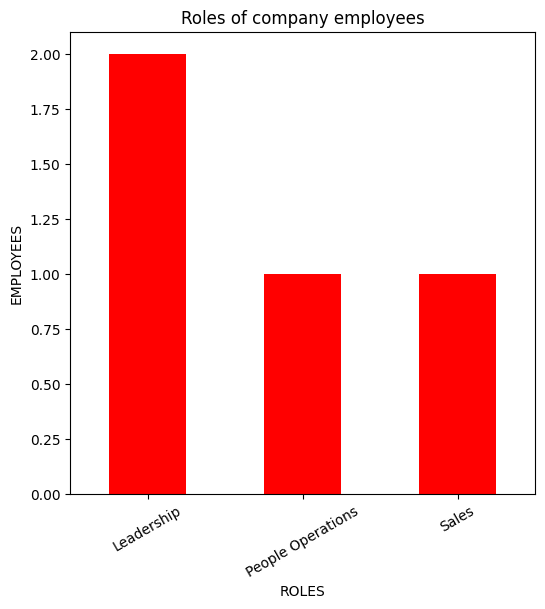

In [41]:
team_fa_bar = team_fa.plot.bar(figsize=(6,6), title="Roles of company employees", rot=30, xlabel="ROLES", ylabel="EMPLOYEES", color="red")

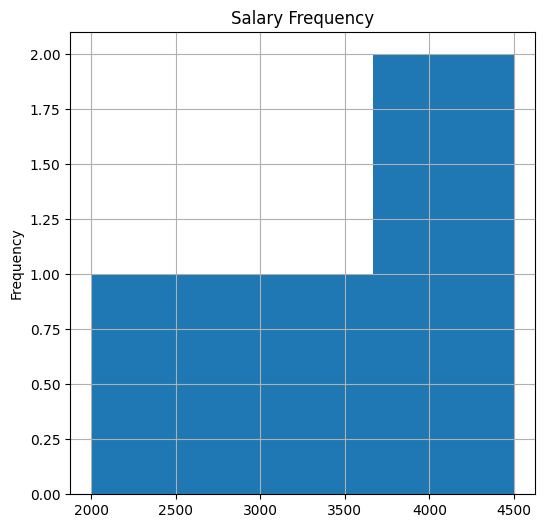

In [47]:
monthly_salary_hist = employees_final["monthly_salary"].plot.hist(figsize=(6,6), bins=np.linspace(2000,4500, num=4), grid=True, title="Salary Frequency")

In [48]:
team_salary_cross = pd.crosstab(employees_final["team"], employees_final["monthly_salary"])
team_salary_cross

monthly_salary,2000,3000,4500
team,,,
Leadership,0,0,2
People Operations,1,0,0
Sales,0,1,0


<Axes: title={'center': 'Team x Salary'}, ylabel='number of employees'>

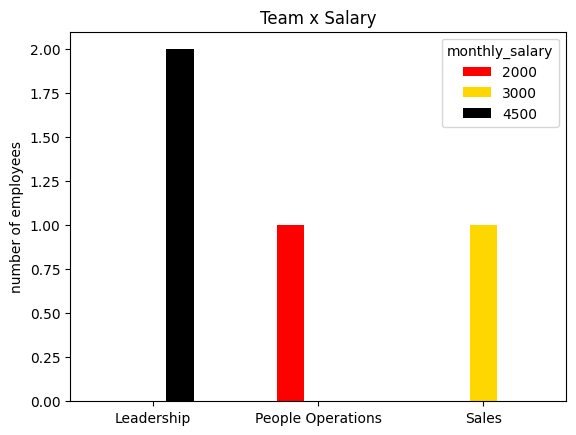

In [54]:
team_salary_cross.plot.bar(rot=0, ylabel="number of employees", title="Team x Salary", xlabel="", color={"red", "gold", "black"})

In [50]:
country_team_cross = pd.crosstab(employees_final["employee_country"], employees_final["team"])
country_team_cross

team,Leadership,People Operations,Sales
employee_country,,,
BE,1,0,0
FR,0,1,0
GB,1,0,0
US,0,0,1


<Axes: title={'center': 'Country x Team'}, ylabel='employees'>

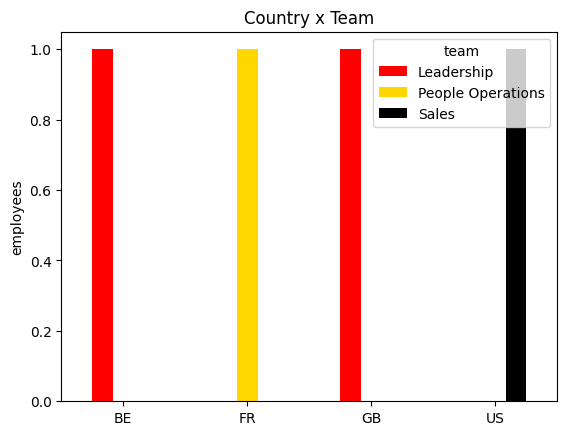

In [51]:
country_team_cross.plot.bar(rot=0, ylabel="employees", title="Country x Team", xlabel="", color={"red", "gold", "black"})

From all this info, we can reach some conclusions:

Country seems to have no direct impact for salary or role. However, since most of them are from European countries anyway, we don't have a sample big enough to confirm or reject a tendency related to employee country.

As thought, leadership positions does have the biggest monthly pay, while sales employee gets paid less than others.

Since this is such a small dataset with not much statistical information, there is not much we can work on, but hopefully it works well enough to show the basics of data analysis.